## ANA-522-OL1 Summer21 
## Final Exam 
### Duration: 3 hours 
### Period: Friday July 16th starting at 5pm - Monday July 19th ending at 8am

#### Total 100 points. Each question 5 points.

## US Baby Names from Social Security Card Applications - National Data

This dataset provides national data (name, year of birth, sex, and quantity) for the most popular names for babies born during each year in the United States. The information is from a 100% sample of Social Security card applications since 1879.

To simplify the task and fit the purpose of our exam, (almost) all source files had been preprocessed and put together as one CSV file. The US Babay Names dataset is available and located on the JupyterHub server with the filename '/home/ANA522/usbnames.csv'

The original source file in full compression can be accessed at https://www.ssa.gov/oact/babynames/names.zip

Further information about the dataset can refer to [SSA open data](https://www.ssa.gov/open/data/)

#### Please create/insert a new code cell below each question (of Markdown) to start writing Python statements.  

In [1]:
# Load integrated yobYYYY.txt to usbname DataFrame
import pandas as pd
usbnames = pd.read_csv('/home/ANA522/usbnames.csv')
usbnames

,Name,Sex,Births,Year
0,Mary,F,73985,1921
1,Dorothy,F,39087,1921
2,Helen,F,34822,1921
3,Margaret,F,28468,1921
4,Ruth,F,25784,1921
...,...,...,...,...
1840649,Zykell,M,5,2020
1840650,Zylus,M,5,2020
1840651,Zymari,M,5,2020
1840652,Zyn,M,5,2020


### Q01. How many different years are covered by the US Babay Names dataset?

In [2]:
print("There are", len(pd.unique(usbnames['Year'])), "years covered by the US Babay Names dataset.")

There are 100 years covered by the US Babay Names dataset.


### Q02. What is the range of years in the US Babay Names dataset?

In [3]:
usbnames['Year'].value_counts()

2008    35084
2007    34964
2009    34715
2006    34096
2010    34085
        ...  
1933     9012
1940     8961
1937     8947
1939     8918
1936     8893
Name: Year, Length: 100, dtype: int64

In [4]:
print ("The range of years in the US Babay Names dataset is 1936 to 2008")

The range of years in the US Babay Names dataset is 1936 to 2008


### Q03. How many distinct names are there in the US Babay Names dataset?

In [5]:
print("There are", len(pd.unique(usbnames['Name'])), "distinct names in the US Babay Names dataset.")

There are 99212 distinct names in the US Babay Names dataset.


### Q04. What is the total number of baby birth samples (Births) collected in the US Babay Names dataset?

In [6]:
print("The total number of baby birth samples collected in the Us Babay Names dataset is", usbnames['Births'].sum())

The total number of baby birth samples collected in the Us Babay Names dataset is 331330715


### Q05. Display a table with top 20 Births values, along with Name, Sex, and Year, in the US Babay Names dataset overall.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q05.png" 
     width="250" height="450" alt="attributes list" />

In [7]:
Q5 = usbnames.sort_values(by=['Births'], ascending=False)
Q5.head(20)

,Name,Sex,Births,Year
250860,Linda,F,99693,1947
261231,Linda,F,96212,1948
256963,James,M,94764,1947
364457,Michael,M,92718,1957
256964,Robert,M,91647,1947
271472,Linda,F,91019,1949
352990,Michael,M,90665,1956
376034,Michael,M,90564,1958
267272,James,M,88589,1948
330620,Michael,M,88576,1954


### Q06. Display a table with each row the total number of Births per year in the US Babay Names dataset.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q06.png" 
     width="200" height="400" alt="attributes list" />

In [8]:
usbnames.groupby(['Year']).sum()

,Births
Year,
1921,2334519
1922,2289176
1923,2302516
1924,2381680
1925,2333347
...,...
2016,3662277
2017,3568294
2018,3505963


### Q07. Display a table with reach row the total number of Births per Sex and per Year in the the US Babay Names dataset.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q07.png" 
     width="200" height="400" alt="attributes list" />

In [53]:
Q7 = usbnames.groupby(['Year','Sex'])['Births'].sum().reset_index()
Q7

,Year,Sex,Births
0,1921,F,1233061
1,1921,M,1101458
2,1922,F,1200998
3,1922,M,1088178
4,1923,F,1206389
...,...,...,...
195,2018,M,1810309
196,2019,F,1670419
197,2019,M,1785527
198,2020,F,1598836


### Q08. Display a table with the total number of Births per Sex in the year of 1921 in the the US Babay Names dataset.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q08.png" 
     width="120" height="180" alt="attributes list" />

In [10]:
Q8 =  usbnames[usbnames['Year']==1921]
Q8.groupby(['Sex'])['Births'].sum()

Sex
F    1233061
M    1101458
Name: Births, dtype: int64

### Q09. Display a table of total number of Births, with Year as index and Sex as columns of F(emale), M(ale), and a total represents the sum of both F and M given the year of the index, converted from the US Babay Names dataset.
>Hint: use pivot_table()   

<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q09.png" 
     width="280" height="480" alt="attributes list" />

In [11]:
Q9 = Q7.pivot(index=['Sex'],columns=['Year']).swapaxes(1,0)
Q9['Total'] = Q9['F'] + Q9['M']
Q9 = Q9.reset_index(level=0, drop=True)
Q9

Sex,F,M,Total
Year,,,
1921,1233061,1101458,2334519
1922,1200998,1088178,2289176
1923,1206389,1096127,2302516
1924,1248892,1132788,2381680
1925,1217405,1115942,2333347
...,...,...,...
2016,1768360,1893917,3662277
2017,1722140,1846154,3568294
2018,1695654,1810309,3505963


### Q10. Draw a line plot with years as x-axis and y-axis as numbers of birth samples(Births) in Male and Female, plus the total of both, over all the years covered in the US Babay Names dataset.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q10.png" 
     width="300" height="500" alt="attributes list" />

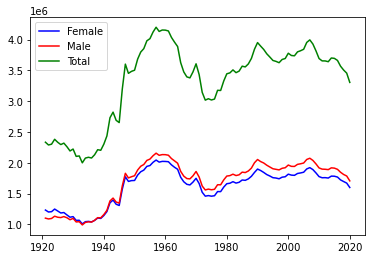

In [12]:
import matplotlib.pyplot as plt
plt.plot(Q9.index, Q9['F'],'b', label ="Female")
plt.plot(Q9.index, Q9['M'],'r', label ="Male")
plt.plot(Q9.index, Q9['Total'],'g', label="Total")
plt.legend(loc="upper left")
plt.show()

### Q11. Create and display a subset to be named usbnames_1921_male in which consists of all data entries of year 1921 and Male in the US Babay Names dataset.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q11.png" 
     width="220" height="400" alt="attributes list" />

In [13]:
usbnames_1921_male = Q8[Q8['Sex']=='M']
usbnames_1921_male = usbnames_1921_male.iloc[:,[0,1,2]]
usbnames_1921_male

,Name,Sex,Births
5870,John,M,58215
5871,Robert,M,52784
5872,William,M,51862
5873,James,M,49749
5874,Charles,M,29243
...,...,...,...
10850,Zackary,M,5
10851,Zebdee,M,5
10852,Zell,M,5
10853,Zigmont,M,5


### Q12. A proportion of a baby name versus all names in a data group is defined to be the percentage of babies given a name relative to the total number of births. Create a new column named Prop consists of the proportion to be added to the usbnames_1921_male.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q12.png" 
     width="300" height="450" alt="attributes list" />

In [14]:
usbnames_1921_male['Births'].sum()
usbnames_1921_male['Prop'] = usbnames_1921_male['Births'] / 1101458
usbnames_1921_male

,Name,Sex,Births,Prop
5870,John,M,58215,0.052853
5871,Robert,M,52784,0.047922
5872,William,M,51862,0.047085
5873,James,M,49749,0.045166
5874,Charles,M,29243,0.026549
...,...,...,...,...
10850,Zackary,M,5,0.000005
10851,Zebdee,M,5,0.000005
10852,Zell,M,5,0.000005
10853,Zigmont,M,5,0.000005


### Q13. A proportion of a baby name versus all names in a data group is defined to be the percentage of babies given a name relative to the total number of births. Group the US Babay Names dataset by Year and Sex. Then add a new column named Prop consists of the percentages with repect to each group. Name the new DataFrame usbnames_Year_Sex_group
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q13.png" 
     width="350" height="500" alt="attributes list" />

In [21]:
usbnames_Year_Sex_group = usbnames.groupby(['Year', 'Sex']).agg({"Births" : "sum"})
usbnames['Births'].sum
usbnames_Year_Sex_group = usbnames
usbnames['Prop'] = usbnames_Year_Sex_group['Births'] / 331330715
usbnames_Year_Sex_group

,Name,Sex,Births,Year,Prop
0,Mary,F,73985,1921,2.232965e-04
1,Dorothy,F,39087,1921,1.179697e-04
2,Helen,F,34822,1921,1.050974e-04
3,Margaret,F,28468,1921,8.592020e-05
4,Ruth,F,25784,1921,7.781953e-05
...,...,...,...,...,...
1840649,Zykell,M,5,2020,1.509066e-08
1840650,Zylus,M,5,2020,1.509066e-08
1840651,Zymari,M,5,2020,1.509066e-08
1840652,Zyn,M,5,2020,1.509066e-08


### Q14. Display a table named top100 which consists of top 100 names by birth numbers for each group which is by both Year and Sex from usbnames_Year_Sex_group from Q13.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q14.png" 
     width="300" height="500" alt="attributes list" />

In [22]:
Top100 = usbnames_Year_Sex_group.groupby(['Year', 'Sex']).head(100)
Top100

,Name,Sex,Births,Year,Prop
0,Mary,F,73985,1921,0.000223
1,Dorothy,F,39087,1921,0.000118
2,Helen,F,34822,1921,0.000105
3,Margaret,F,28468,1921,0.000086
4,Ruth,F,25784,1921,0.000078
...,...,...,...,...,...
1826838,Adam,M,3751,2020,0.000011
1826839,Jace,M,3745,2020,0.000011
1826840,Wesley,M,3668,2020,0.000011
1826841,Kayden,M,3613,2020,0.000011


### Q15. Transform the top100 to have Year as index and Name as columns to hold the Births value in the table, and name the table top100_table.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q15.png" 
     width="1000" height="300" alt="attributes list" />

In [26]:
Q15 = pd.crosstab(Top100.Year, Top100.Name, values = Top100.Births, aggfunc = 'sum', margins=True)
Q15

Name,Aaliyah,Aaron,Abigail,Adam,Addison,Adeline,Adrian,Agnes,Aidan,Aiden,...,Willow,Wilma,Wyatt,Xavier,Yolanda,Yvonne,Zachary,Zoe,Zoey,All
Year,,,,,,,,,,,,,,,,,,,,,
1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4798.0,NaN,NaN,...,NaN,3823.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1606257
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4480.0,NaN,NaN,...,NaN,3535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1568652
1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4222.0,NaN,NaN,...,NaN,3706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1581915
1924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4240.0,NaN,NaN,...,NaN,4065.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1635771
1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3911.0,NaN,NaN,...,NaN,4175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1602797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,4181.0,7208.0,10624.0,4924.0,5627.0,3928.0,6224.0,NaN,NaN,11326.0,...,3559.0,NaN,9706.0,4502.0,NaN,NaN,NaN,5166.0,6056.0,1360586
2018,3833.0,5975.0,9854.0,4697.0,5220.0,3481.0,5809.0,NaN,NaN,10025.0,...,3915.0,NaN,9164.0,4324.0,NaN,NaN,NaN,5111.0,5923.0,1314711
2019,3649.0,5520.0,9134.0,4179.0,4478.0,3065.0,5762.0,NaN,NaN,9358.0,...,4582.0,NaN,8798.0,4171.0,NaN,NaN,NaN,5056.0,5663.0,1278580


### Q16. Display and create a subset, named JHEE_table, from the top100_table with only names in the JHEE_NameList as columns.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q16.png" 
     width="300" height="500" alt="attributes list" />

In [54]:
JHEE_NameList = ['John', 'Henry', 'Emma', 'Elizabeth']
boolean_series = Top100.Name.isin(JHEE_NameList)
Q16 = Top100[boolean_series]
JHEE_table = pd.crosstab(Q16.Year, Q16.Name, values = Top100.Births, aggfunc = 'sum', margins=True)
del JHEE_table['All']
JHEE_table = JHEE_table.drop(labels="All", axis=0)
JHEE_table

Name,Elizabeth,Emma,Henry,John
Year,,,,
1921,15801.0,5073.0,11411.0,58215.0
1922,15243.0,5013.0,11207.0,57280.0
1923,15461.0,4977.0,11067.0,57469.0
1924,14950.0,4897.0,11197.0,59054.0
1925,13936.0,4714.0,10615.0,57200.0
...,...,...,...,...
2016,9572.0,19522.0,10383.0,10034.0
2017,8977.0,19837.0,10469.0,9503.0
2018,8565.0,18770.0,10698.0,9170.0


### Q17. Display JHEE_table with the format of one Births value per entry for Year and Name combination.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q17.png" 
     width="250" height="450" alt="attributes list" />

In [55]:
JHEE_table.stack()

Year  Name     
1921  Elizabeth    15801.0
      Emma          5073.0
      Henry        11411.0
      John         58215.0
1922  Elizabeth    15243.0
                    ...   
2019  John          8813.0
2020  Elizabeth     7216.0
      Emma         15581.0
      Henry        10705.0
      John          8180.0
Length: 313, dtype: float64

### Q18. Draw a line plot to observe the Births values of JHEE_NameList over Year using JHEE_table.
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q18.png" 
     width="300" height="500" alt="attributes list" />

<AxesSubplot:xlabel='Year'>

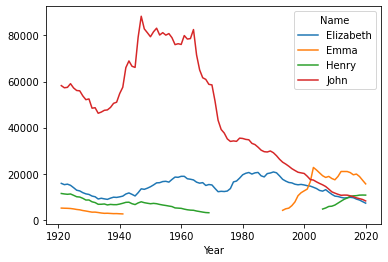

In [56]:
JHEE_table.plot()

### Q19. Display the JHEE_table with Name as index and Year as columns. 
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q19.png" 
     width="1000" height="400" alt="attributes list" />

In [49]:
JHEE_table = JHEE_table.transpose()
JHEE_table

Year,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Name,,,,,,,,,,,,,,,,,,,,,
Elizabeth,15801.0,15243.0,15461.0,14950.0,13936.0,12835.0,12526.0,11765.0,11249.0,10996.0,...,10095.0,9715.0,9459.0,9576.0,9745.0,9572.0,8977.0,8565.0,7879.0,7216.0
Emma,5073.0,5013.0,4977.0,4897.0,4714.0,4480.0,4326.0,4017.0,3803.0,3554.0,...,18808.0,20954.0,20950.0,20943.0,20465.0,19522.0,19837.0,18770.0,17155.0,15581.0
Henry,11411.0,11207.0,11067.0,11197.0,10615.0,9998.0,9868.0,9316.0,8571.0,8594.0,...,7233.0,8069.0,8882.0,9437.0,10177.0,10383.0,10469.0,10698.0,10737.0,10705.0
John,58215.0,57280.0,57469.0,59054.0,57200.0,56106.0,55954.0,53757.0,52113.0,52441.0,...,11058.0,10628.0,10716.0,10693.0,10398.0,10034.0,9503.0,9170.0,8813.0,8180.0


### Q20. What are the average Births for JHEE_NameList over all years?
<img src="http://mathqs.mcdaniel.edu/ANA522/exam/F_Q20.png" 
     width="250" height="400" alt="attributes list" />

In [51]:
Q16.groupby(['Name'])['Births'].mean()

Name
Elizabeth    14203.770000
Emma         10573.612245
Henry         7221.234375
John         44538.070000
Name: Births, dtype: float64